In [1]:
from math import *
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True, use_latex='mathjax')
%matplotlib inline

In [2]:
VeloMPH = 90.8 #Translational velocity of the baseball in MPH from Rapsodo
#Velo = [] #Velocity in m/s
SpinM = 1733 #True spin of baseball in RPM
#SpinS = [] #True spin of baseball in RPS
VertIN = 18.2 #Vertical movement of each pitch from Rapsodo in inches
#Vert = [] #Vertical movement in meters
HorIN = 4.7 #Horizontal movement of each pitch in inches
#Hor = [] #Horizontal movement in meters
#Move = [] #Total movement in inches
S = [] #Spin factor for each pitch
SV = [] #Spin factor times velocity for each pitch
R = 0.038 #Radius of baseball in meters
A = R**2*np.pi #Cross sectional area of baseball in meters
P = 1.23 #kg/m^3 density of air at STP
XFT = 60.5 #Distance the ball travels in feet
Gam = 0.25 #N*s^2/m^4 for air at STP
D = 2*R #Diameter of baseball in meters
m = 0.145 #Mass of ball in kg
delT = 0.001 #Change in time
g = 9.81 #Gravitational constant

In [3]:
Move = ((VertIN**2 + HorIN**2)**(1/2))

In [4]:
    Velo = VeloMPH * 0.44704 #Miles per hour to meters per second
    SpinS = (SpinM / 60) #Rotations per minute to rotations per second
    Move = Move * 0.0254 #Inches to meters
    Vert = (VertIN * 0.0254)#Inches to meters in absolute value
    #Vert = abs(Vert)
    Hor = (HorIN * 0.0254) #Inches to meters in absolute value
   # Hor = abs(Hor)
    
X = XFT * 0.3048 #Feet to meters

In [5]:
    CL = 0.1370722729389064
    i = 0
    #Movement variables
    xpos= [] #Distance the ball has traveled from the pitching machine to the plate
    ypos= []
    zpos= [] #Pitching machine starts about 5 feet above the ground. This does not matter, only need Mag variables
    xvel= []
    yvel= []
    zvel= []
    xpos.append(0)
    ypos.append(0)
    zpos.append(5)
    xvel.append(Velo)
    yvel.append(0)
    zvel.append(0)
    yposmag = []
    zposmag = []
    yvelmag = []
    zvelmag = []
    yposmag.append(0)
    zposmag.append(0)
    yvelmag.append(0)
    zvelmag.append(0)
    while (xpos[i] <= X):
        v = (xvel[i]**2 + yvel[i]**2 + zvel[i]**2)**0.5
        #Actual positions
        xpos.append (xpos[i] + xvel[i]*delT)
        ypos.append (ypos[i] + yvel[i]*delT)
        zpos.append (zpos[i] + zvel[i]*delT)
        xvel.append (xvel[i] - (Gam*D*D/m)*v*xvel[i]*delT)
        yvel.append (yvel[i] - (Gam*D*D/m)*v*yvel[i]*delT + 0.5*P*A*v*v*CL*np.sin(np.arctan(Hor/Vert))*delT/m)
        zvel.append (zvel[i] - g*delT - (Gam*D*D/m)*v*zvel[i]*delT + 0.5*P*A*v*v*CL*np.cos(np.arctan(Hor/Vert))*delT/m)
        #Movement just from the Magnus Force
        yposmag.append (yposmag[i] + yvelmag[i]*delT)
        zposmag.append (zposmag[i] + zvelmag[i]*delT)
        yvelmag.append (yvelmag[i] + 0.5*P*A*v*v*CL*np.sin(np.arctan(Hor/Vert))*delT/m)
        zvelmag.append (zvelmag[i] + 0.5*P*A*v*v*CL*np.cos(np.arctan(Hor/Vert))*delT/m)
        i = i + 1


In [6]:
    CLH = 0.19531349804687498
    i = 0
    #Movement variables
    xposH= [] #Distance the ball has traveled from the pitching machine to the plate
    yposH= []
    zposH= [] #Pitching machine starts about 5 feet above the ground. This does not matter, only need Mag variables
    xvelH= []
    yvelH= []
    zvelH= []
    xposH.append(0)
    yposH.append(0)
    zposH.append(5)
    xvelH.append(Velo)
    yvelH.append(0)
    zvelH.append(0)
    yposmagH = []
    zposmagH = []
    yvelmagH = []
    zvelmagH = []
    yposmagH.append(0)
    zposmagH.append(0)
    yvelmagH.append(0)
    zvelmagH.append(0)
    while (xposH[i] <= X):
        vH = (xvelH[i]**2 + yvelH[i]**2 + zvelH[i]**2)**0.5
        #Actual positions
        xposH.append (xposH[i] + xvelH[i]*delT)
        yposH.append (yposH[i] + yvelH[i]*delT)
        zposH.append (zposH[i] + zvelH[i]*delT)
        xvelH.append (xvelH[i] - (Gam*D*D/m)*vH*xvelH[i]*delT)
        yvelH.append (yvelH[i] - (Gam*D*D/m)*vH*yvelH[i]*delT + 0.5*P*A*vH*vH*CLH*np.sin(np.arctan(Hor/Vert))*delT/m)
        zvelH.append (zvelH[i] - g*delT - (Gam*D*D/m)*vH*zvelH[i]*delT + 0.5*P*A*vH*vH*CLH*np.cos(np.arctan(Hor/Vert))*delT/m)
        #Movement just from the Magnus Force
        yposmagH.append (yposmagH[i] + yvelmagH[i]*delT)
        zposmagH.append (zposmagH[i] + zvelmagH[i]*delT)
        yvelmagH.append (yvelmagH[i] + 0.5*P*A*vH*vH*CLH*np.sin(np.arctan(Hor/Vert))*delT/m)
        zvelmagH.append (zvelmagH[i] + 0.5*P*A*vH*vH*CLH*np.cos(np.arctan(Hor/Vert))*delT/m)
        i = i + 1


In [7]:
    CLL =0.09765724902343749
    i = 0
    #Movement variables
    xposL= [] #Distance the ball has traveled from the pitching machine to the plate
    yposL= []
    zposL= [] #Pitching machine starts about 5 feet above the ground. This does not matter, only need Mag variables
    xvelL= []
    yvelL= []
    zvelL= []
    xposL.append(0)
    yposL.append(0)
    zposL.append(5)
    xvelL.append(Velo)
    yvelL.append(0)
    zvelL.append(0)
    yposmagL = []
    zposmagL = []
    yvelmagL = []
    zvelmagL = []
    yposmagL.append(0)
    zposmagL.append(0)
    yvelmagL.append(0)
    zvelmagL.append(0)
    while (xposL[i] <= X):
        vL = (xvelL[i]**2 + yvelL[i]**2 + zvelL[i]**2)**0.5
        #Actual positions
        xposL.append (xposL[i] + xvelL[i]*delT)
        yposL.append (yposL[i] + yvelL[i]*delT)
        zposL.append (zposL[i] + zvelL[i]*delT)
        xvelL.append (xvelL[i] - (Gam*D*D/m)*vL*xvelL[i]*delT)
        yvelL.append (yvelL[i] - (Gam*D*D/m)*vL*yvelL[i]*delT + 0.5*P*A*vL*vL*CLL*np.sin(np.arctan(Hor/Vert))*delT/m)
        zvelL.append (zvelL[i] - g*delT - (Gam*D*D/m)*vL*zvelL[i]*delT + 0.5*P*A*vL*vL*CLL*np.cos(np.arctan(Hor/Vert))*delT/m)
        #Movement just from the Magnus Force
        yposmagL.append (yposmagL[i] + yvelmagL[i]*delT)
        zposmagL.append (zposmagL[i] + zvelmagL[i]*delT)
        yvelmagL.append (yvelmagL[i] + 0.5*P*A*vL*vL*CLL*np.sin(np.arctan(Hor/Vert))*delT/m)
        zvelmagL.append (zvelmagL[i] + 0.5*P*A*vL*vL*CLL*np.cos(np.arctan(Hor/Vert))*delT/m)
        i = i + 1


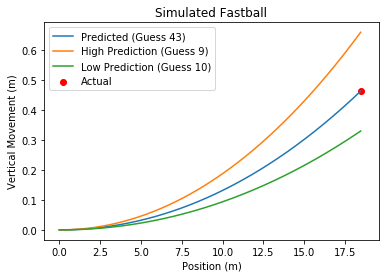

In [8]:
plt.plot (xpos, zposmag, label = "Predicted (Guess 43)")
plt.plot (xposH, zposmagH, label = "High Prediction (Guess 9)")
plt.plot (xposL, zposmagL, label = "Low Prediction (Guess 10)")
plt.xlabel ("Position (m)")
plt.ylabel ("Vertical Movement (m)")
plt.title("Simulated Fastball")
plt.scatter (xpos[i], Vert, c='r', label = "Actual")
plt.legend()